In [7]:
%load_ext autoreload
%autoreload 2

#Packages
import numpy as np
import matplotlib.pyplot as plt
import pickle

#.py
from core import qlearning as q 
from core import prices as pr 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Import the data calculate on cluster thanks to the file res_multiplayers.py

In [8]:
import pickle

# Path to the pickle file
pickle_file_path = '/Volumes/OS-Data/Suzie_data/RLandPricing/data/data_multiplayers.pkl'

# Open the file in binary read mode
with open(pickle_file_path, 'rb') as file:
    aggregated_agents = pickle.load(file)

# Now, "aggregated_agents" contains the object saved in the pickle file
print(aggregated_agents)

[array([[0.22906067, 0.29756479],
       [0.28969859, 0.29537524],
       [0.25045259, 0.31083396],
       ...,
       [0.31420635, 0.29307338],
       [0.23497459, 0.33929601],
       [0.28737301, 0.30870627]]), array([[0.17821265, 0.20091766, 0.16058111],
       [0.15527142, 0.11764934, 0.20170269],
       [0.19307598, 0.14395114, 0.10550267],
       ...,
       [0.2026855 , 0.13089149, 0.11623841],
       [0.171626  , 0.22463884, 0.21497815],
       [0.12407824, 0.16756988, 0.17622629]]), array([[0.13453491, 0.1415255 , 0.09925905, 0.14393854],
       [0.11723517, 0.14416663, 0.15577798, 0.11115469],
       [0.09921086, 0.14304447, 0.11265347, 0.07826961],
       ...,
       [0.12297606, 0.12815483, 0.19675033, 0.13584161],
       [0.14942424, 0.17607993, 0.10570263, 0.16328622],
       [0.12718354, 0.09876797, 0.10123662, 0.14168353]]), array([[0.11012864, 0.08383339, 0.11023243, 0.05511458, 0.07718092],
       [0.09975488, 0.08595945, 0.11177534, 0.13058696, 0.10584022],
       [0

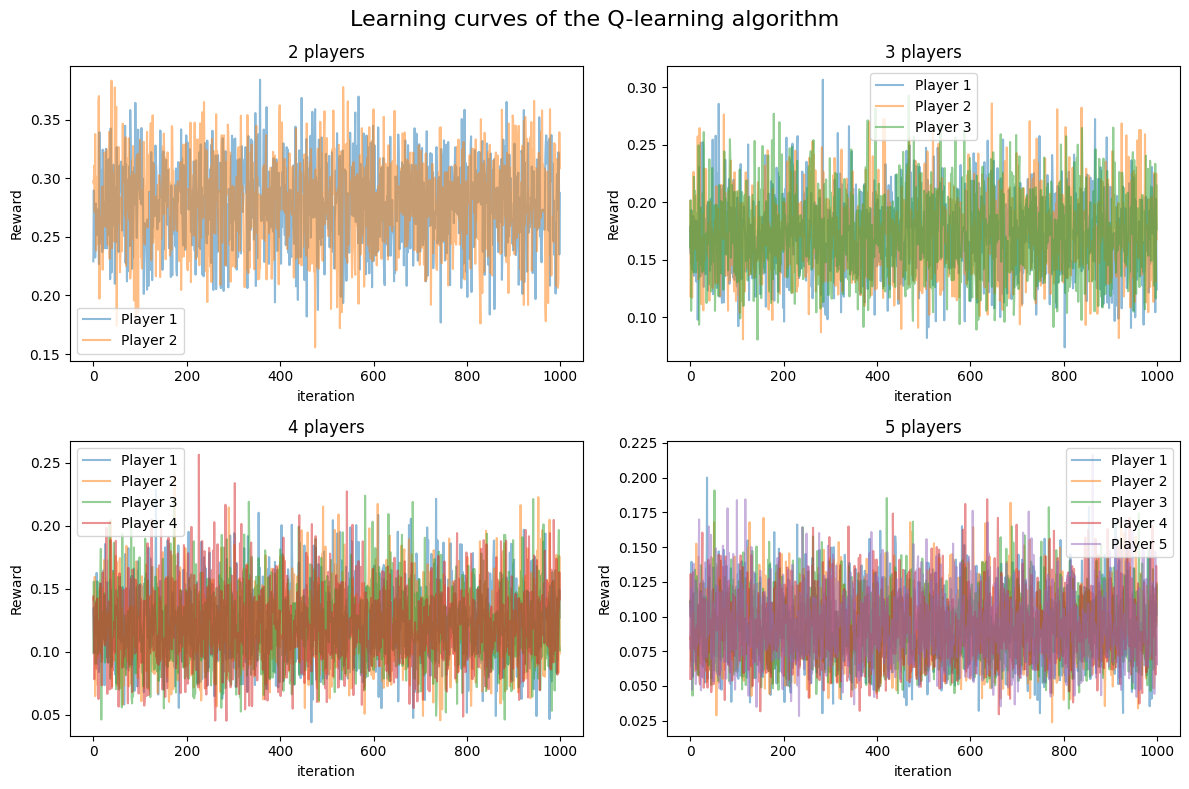

In [12]:
num_graphs = len(aggregated_agents)

# Create a figure with a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Flatten the axes array to iterate over the subplots
axes = axes.flatten()

# Loop to iterate through the periods and subplots
for graph_num in range(num_graphs):
    ax = axes[graph_num]
    num_players = len(aggregated_agents[graph_num][0])
    # Plot curves for each player in the subplot
    for player in range(num_players):
        ax.plot(aggregated_agents[graph_num][:, player], alpha=0.5, label=f'Player {player+1}')
    
    # Set the title of the subplot with the corresponding period
    ax.set_title(f'{graph_num+2} players')
    
    # Add a legend to the subplot
    ax.legend()
    
    # Set the labels of the subplot
    ax.set_xlabel('iteration')
    ax.set_ylabel('Reward')

# Remove any unused subplots
if num_graphs < 4:
    for i in range(num_graphs, 4):
        fig.delaxes(axes[i])
        
fig.suptitle('Learning curves of the Q-learning algorithm', fontsize=16)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

In [10]:
nb_players = 5
RN = []
RC = []
for i in range (2,nb_players+1):
    prices = pr.PriceOptimizer(nb_players=i)
    collusion_profit, collusion_prices = prices.CollusionPrice()
    nash_profit, nash_prices = prices.NashPrice()
    RN.append(nash_profit)
    RC.append(collusion_profit)
    
Rmean = np.zeros((len(aggregated_agents), 2))
DRmean = np.zeros((len(aggregated_agents), 2))   
    
for i in range (len(aggregated_agents)): 
    for j in range (2):
        Rmean[i][j] = aggregated_agents[i][-2:,j].mean()
        DRmean[i][j] = (Rmean[i][j] - RN[i])/(RC[i] - RN[i]) 

print(DRmean)

[[0.34093674 0.88350754]
 [0.21356987 0.58506083]
 [0.47664563 0.4693124 ]
 [0.46246324 0.45004482]]


[0.61222214 0.39931535 0.47297902 0.45625403]


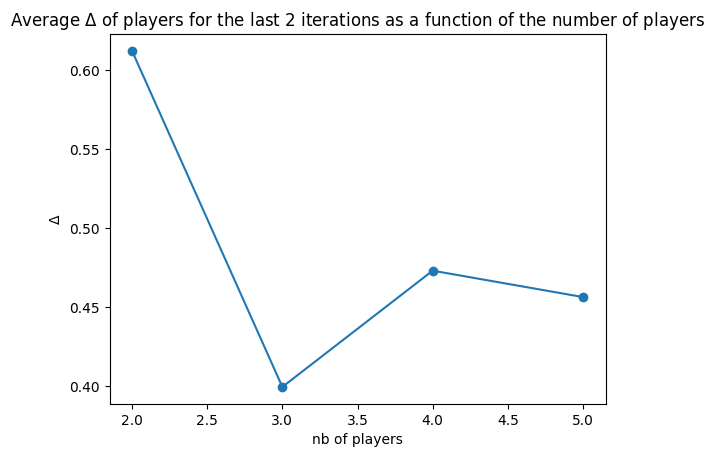

In [11]:
av = np.mean(DRmean, axis=1)
print(av)
plt.plot([2,3,4,5],av, linestyle='-', marker='o')
plt.xlabel('nb of players')
plt.ylabel('$\\Delta$')
plt.title('Average $\\Delta$ of players for the last 2 iterations as a function of the number of players')
plt.show()